In [4]:
import numpy as np
import pandas as pd
    
# for performing text clustering    
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# for providing the path
import os


# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [11]:
# importing the excel file
data = pd.read_excel('C:/Users/Swapna/Desktop/xxx/textClustering/Text_Clustering.xlsx', header = None)

# converting the data  to csv format
data.to_csv('C:/Users/Swapna/Desktop/xxx/textClustering/your_csv.csv', encoding='utf-8')

# reading the data in csv format
data = pd.read_csv('your_csv.csv')

# getting the shape
data.shape

(200, 2)

In [12]:
# assigning names to the columns

data.columns = ['Id', 'Text']

# checking the names of the columns
data.columns

Index(['Id', 'Text'], dtype='object')

In [14]:
# getting the length of the text as another feature

data['Length'] = data['Text'].apply(len)

In [15]:
# describing the dataset

data.groupby('Length').describe().head(20)

Id                                              
       count   mean std    min    25%    50%    75%    max
Length                                                    
648      1.0  103.0 NaN  103.0  103.0  103.0  103.0  103.0
721      1.0  154.0 NaN  154.0  154.0  154.0  154.0  154.0
742      1.0  161.0 NaN  161.0  161.0  161.0  161.0  161.0
743      1.0    6.0 NaN    6.0    6.0    6.0    6.0    6.0
758      1.0  184.0 NaN  184.0  184.0  184.0  184.0  184.0
760      1.0   77.0 NaN   77.0   77.0   77.0   77.0   77.0
765      1.0  167.0 NaN  167.0  167.0  167.0  167.0  167.0
784      1.0   64.0 NaN   64.0   64.0   64.0   64.0   64.0
786      1.0   46.0 NaN   46.0   46.0   46.0   46.0   46.0
789      1.0  194.0 NaN  194.0  194.0  194.0  194.0  194.0
791      1.0   50.0 NaN   50.0   50.0   50.0   50.0   50.0
811      1.0    5.0 NaN    5.0    5.0    5.0    5.0    5.0
815      1.0   18.0 NaN   18.0   18.0   18.0   18.0   18.0
840      1.0   30.0 NaN   30.0   30.0   30.0   30.0   30.0
856      1.0   93.0 NaN   93.0   93.0   93.0   93.0   93.0
859      1.0   28.0 NaN   28.0   28.0   28.0   28.0   28.0
875      1.0  166.0 NaN  166.0  166.0  166.0  166.0  166.0
882      1.0   14.0 NaN   14.0   14.0   14.0   14.0   14.0
892      1.0  187.0 NaN  187.0  187.0  187.0  187.0  187.0
894      1.0   42.0 NaN   42.0   42.0   42.0   42.0   42.0

## Data Visualization

Text(0.5, 1.0, 'The Distribution of Length over the Texts')

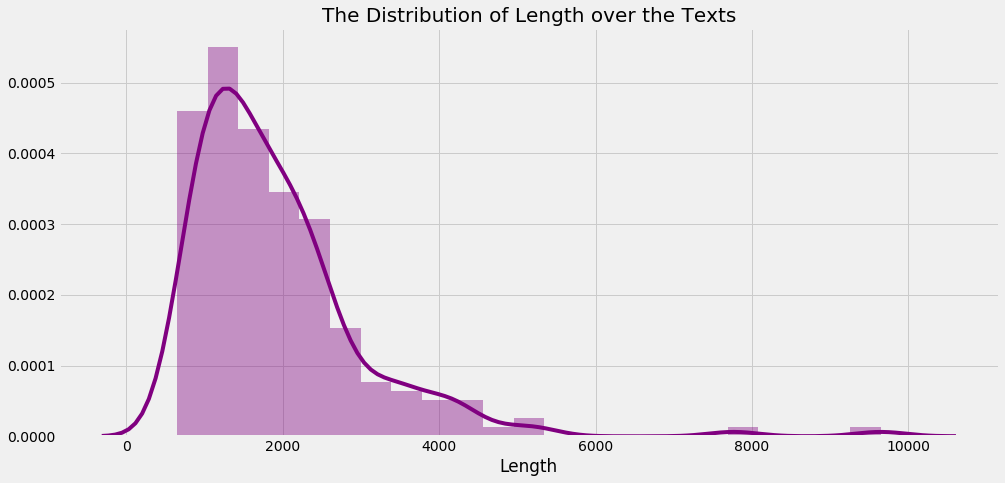

In [17]:
# looking at the distribution of length of the different texts

plt.rcParams['figure.figsize'] = (15, 7)
sns.distplot(data['Length'], color = 'purple')
plt.title('The Distribution of Length over the Texts', fontsize = 20)

Text(0.5, 1.0, 'WordCloud ')

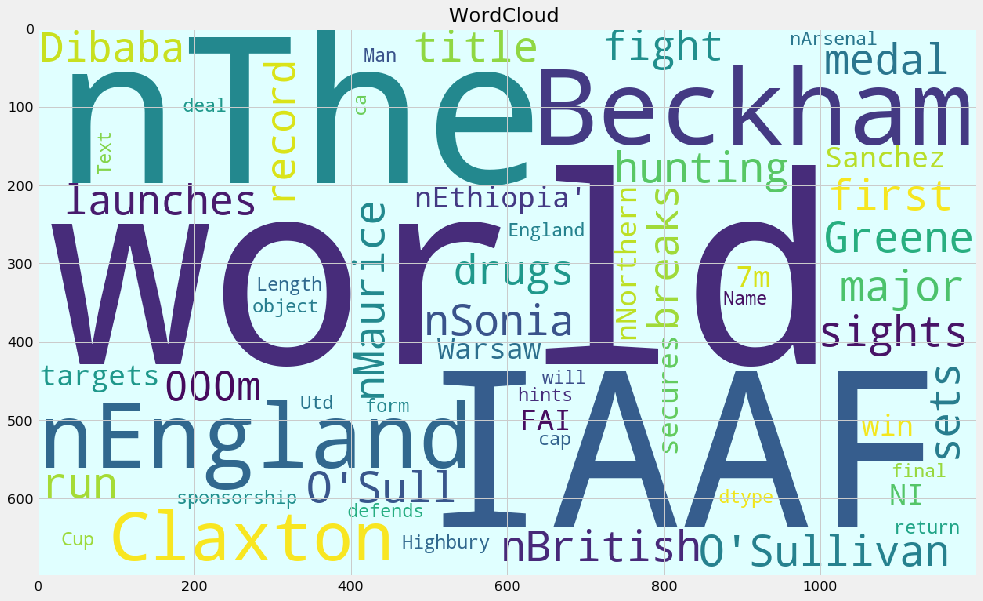

In [25]:
# wordcloud

from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightcyan',
                      width = 1200,
                      height = 700).generate(str(data['Text']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.title("WordCloud ", fontsize = 20)

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

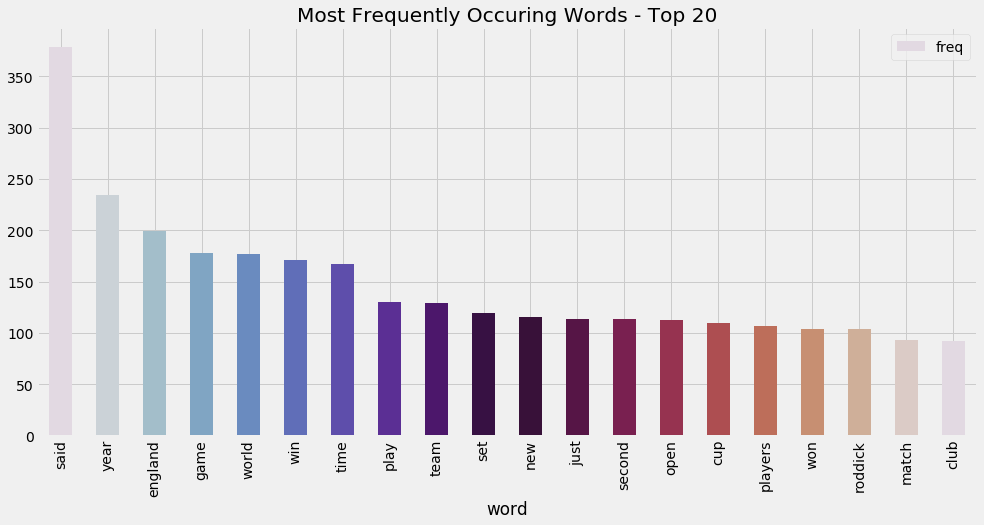

In [26]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data['Text'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

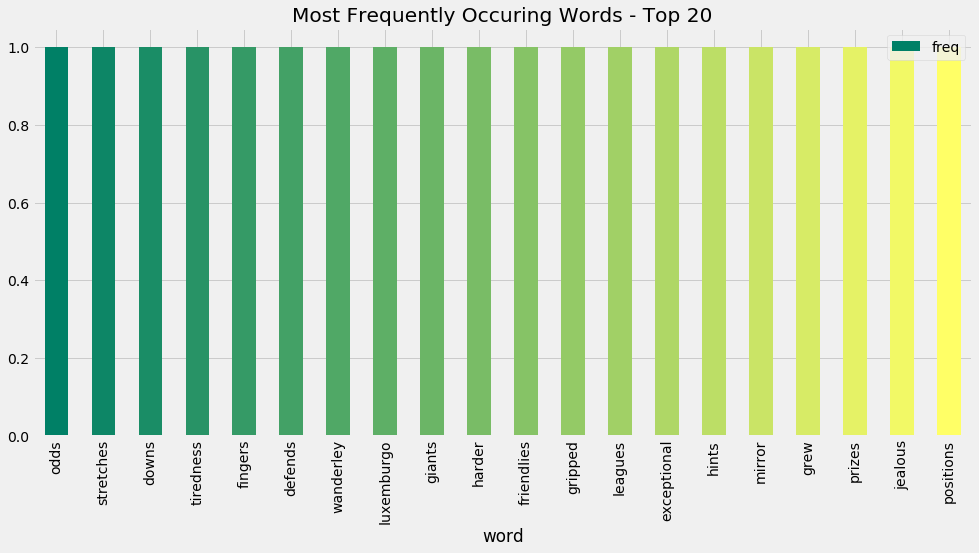

In [27]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data['Text'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.summer(np.linspace(0, 1, 20))
frequency.tail(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")